In [1]:
"""Prédire la Valeur fonciere du bien avec les critères suivants : type local, code postal,Nombre pieces principales et Surface reelle bati, montrer les résultats sur un graphique grâce à Plotly"""

'Prédire la Valeur fonciere du bien avec les critères suivants : type local, code postal,Nombre pieces principales et Surface reelle bati, montrer les résultats sur un graphique grâce à Plotly'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from data_loader import load_house_attributes

In [2]:
df_paris = load_house_attributes('https://www.data.gouv.fr/fr/datasets/r/90a98de0-f562-4328-aa16-fe0dd1dca60f')

In [3]:
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32470 entries, 2405430 to 2459559
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Valeur fonciere            32470 non-null  float64
 1   Code postal                32470 non-null  object 
 2   Commune                    32470 non-null  object 
 3   Code departement           32470 non-null  object 
 4   Type local                 32470 non-null  object 
 5   Surface reelle bati        32470 non-null  float64
 6   Nombre pieces principales  32470 non-null  int32  
dtypes: float64(2), int32(1), object(4)
memory usage: 1.9+ MB


In [4]:
df_paris.describe()

,Valeur fonciere,Surface reelle bati,Nombre pieces principales
count,3.247000e+04,32470.000000,32470.000000
mean,6.786305e+05,51.947213,2.377148
std,7.278599e+05,38.451726,1.271941
min,1.500000e-01,5.000000,1.000000
25%,2.750000e+05,27.000000,1.000000
50%,4.540000e+05,42.000000,2.000000
75%,7.787505e+05,65.000000,3.000000
max,5.000000e+06,469.000000,17.000000


In [5]:
df_paris['Code postal'].value_counts()

75018.0    3604
75015.0    3249
75016.0    2758
75017.0    2741
75011.0    2604
75020.0    2172
75019.0    1969
75010.0    1808
75012.0    1742
75014.0    1707
75013.0    1420
75009.0    1209
75007.0     898
75005.0     858
75006.0     826
75003.0     745
75008.0     719
75004.0     567
75002.0     520
75001.0     354
Name: Code postal, dtype: int64

<Figure size 720x720 with 0 Axes>

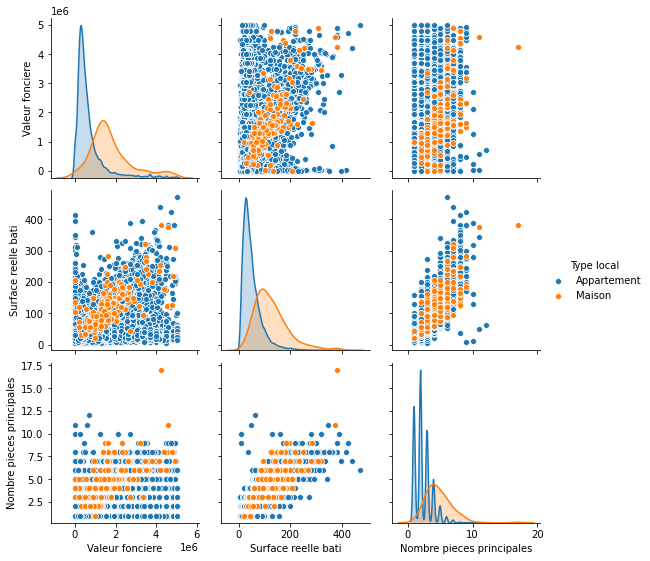

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.pairplot(df_paris[['Valeur fonciere','Surface reelle bati','Nombre pieces principales','Type local']], hue='Type local')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train, test = train_test_split(df_paris, test_size=0.25, random_state=42)

In [9]:
print('Training Shape:', train.shape)
print('Testing Shape:', test.shape)

Training Shape: (24352, 7)
Testing Shape: (8118, 7)


In [10]:
from processing_attributes import process_house_attributes

In [11]:
train_x, test_x = process_house_attributes(df_paris, train, test)

In [12]:
train_y = train["Valeur fonciere"] 
test_y = test["Valeur fonciere"] 

In [13]:
from regr import regression

In [14]:
regr = regression(train_x, train_y)

In [15]:
for name, feature in zip(['Nombre pieces principales','Surface reelle bati', 'Code postal', 'Type local'], regr.feature_importances_):
    print(name, round(feature*100,1))

Nombre pieces principales 0.2
Surface reelle bati 6.0
Code postal 92.6
Type local 1.2


In [16]:
"""Les critères les plus importants pour prédire la valeur d'un bien à Paris sont l'arrondissement et la surface"""

"Les critères les plus importants pour prédire la valeur d'un bien à Paris sont l'arrondissement et la surface"

In [35]:
predictions = regr.predict(test_x)
errors = abs(predictions - test_y)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'euros.')

Mean Absolute Error: 294980.4 euros.


In [18]:
value = round(np.mean(errors), 2)

In [19]:
'NOT ENOUGH DATA TO HAVE A BETTER MODEL'

'NOT ENOUGH DATA TO HAVE A BETTER MODEL'

In [20]:
'Estimez votre bien :'

'Estimez votre bien :'

In [21]:
print("Quelle est la surface du bien ? ")
surface = input()
print("Quelle est le nombre de pièce du bien ? ")
piece = input()
print("Est-ce un Appartement ou une Maison ? ")
type_bien = input()
print("Entrer le code postal : ")
arrondissement = input()

Quelle est la surface du bien ? 


 30


Quelle est le nombre de pièce du bien ? 


 2


Est-ce un Appartement ou une Maison ? 


 Appartement


Entrer le code postal : 


 75018


In [30]:
attributes = {'Surface reelle bati':[100],
        'Nombre pieces principales':[3], 
             'Type local': ['Maison'], 
             'Code postal': [75018]}

In [31]:
df_input = pd.DataFrame(attributes)

In [32]:
from inputs import process_attributes

In [33]:
attr = process_attributes(df_input)
pred_y = regr.predict(attr)
pred_y

array([589875.90003228])

In [26]:
votre_estimation = pred.tolist()
est_0 = round(np.mean(votre_estimation), 2)
est_0

589875.9

In [59]:
intervalle =[est_0 - value, est_0 + value]
print("Voici votre estimation :", intervalle, "euros.")

Voici votre estimation : [294895.5, 884856.3] euros.
